# Welter issue #5
## Predict Teff vs order
### Part 4- Measured values for the synthetic, noised-up mixture model.

Michael Gully-Santiago  
Tuesday, January 12, 2016  

Do everything the same, except for *synthetic* data.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

In [3]:
import h5py

In [4]:
import pandas as pd

### Read in the values derived for real data.

In [8]:
sf_dat = pd.read_csv('../data/analysis/IGRINS_ESPaDOnS_run01_last10kMCMC.csv')
sf_dat.rename(columns={"m_val_x":"m_val"}, inplace=True)
del sf_dat['m_val_y']

In [10]:
sf_dat.head()

,m_val,number,wl_center,wl_end,wl_start,Teff_05p,Teff_50p,Teff_95p,logg_05p,logg_50p,...,SA_05p,SA_50p,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p,m_int
0,0,0,5180.62500,5199.9292,5161.3208,3671.597583,3734.931152,3918.759131,3.757152,3.929592,...,4.130559,4.424212,4.735918,-1.030014,-0.915195,-0.820424,56.789884,72.114952,82.728920,0
1,1,1,5231.25700,5262.5311,5199.9829,3910.707983,3991.772217,4062.312549,3.531365,3.655367,...,3.515317,3.773452,4.024213,-1.249743,-1.176541,-1.078180,35.295181,41.962921,52.413920,1
2,2,2,5294.98655,5327.4005,5262.5726,3850.192407,3990.523193,4186.905322,3.815876,3.936076,...,3.121204,3.315826,3.529300,-1.314615,-1.223884,-1.141970,36.250294,46.100685,56.028513,2
3,3,3,5360.99580,5394.5496,5327.4420,3846.459961,3923.694824,3995.909888,3.585957,3.762359,...,2.058792,2.182574,2.324363,-1.328933,-1.267863,-1.195140,37.950161,43.088070,49.906529,3
4,4,4,5429.35055,5464.0826,5394.6185,3727.496973,3812.548828,3867.507104,3.572361,3.817147,...,2.110130,2.260994,2.406161,-1.200368,-1.147594,-1.093094,44.042196,48.723873,53.670507,4


## Synthetic data

You can have pandas read the clipboard if you copy the output from the terminal.  Saves a step of copying files over, at the expense of reproducibility...

```python
sf_dat = pd.read_clipboard(names=dat_names, sep=r',\s+', squeeze=True)

sf_dat.to_csv('../data/analysis/run02_by_order.csv', index=False)
```

In [11]:
dat_names = ['m_val', 
              'Teff_05p', 'Teff_50p', 'Teff_95p',
              'logg_05p', 'logg_50p', 'logg_95p',
              'FeH_05p', 'FeH_50p', 'FeH_95p',
              'vz_05p', 'vz_50p', 'vz_95p',
              'vi_05p', 'vi_50p', 'vi_95p',
              'logO_05p', 'logO_50p', 'logO_95p',
              'c1_05p', 'c1_50p', 'c1_95p',
              'c2_05p', 'c2_50p', 'c2_95p',
              'c3_05p', 'c3_50p', 'c3_95p',
              'SA_05p', 'SA_50p', 'SA_95p',
              'LA_05p', 'LA_50p', 'LA_95p',
              'll_05p', 'll_50p', 'll_95p']

In [12]:
#syn_dat = pd.read_clipboard(names=dat_names, sep=r',\s+', squeeze=True)
#syn_dat.to_csv('../data/analysis/temp.csv', index=False)

In [16]:
syn_dat.head()

,m_val,Teff_05p,Teff_50p,Teff_95p,logg_05p,logg_50p,logg_95p,FeH_05p,FeH_50p,FeH_95p,...,c3_95p,SA_05p,SA_50p,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p
0,000,4041.662378,4059.251953,4076.764648,3.501488,3.521508,3.606083,0.081660,0.109397,0.137297,...,0.029043,0.520791,0.562177,0.608948,-1.926611,-1.806501,-1.705192,51.595860,76.922157,83.779205
1,001,3996.247314,4018.036377,4041.000977,3.502199,3.538740,3.610054,-0.077031,-0.043202,-0.020103,...,0.004974,0.444142,0.472805,0.502586,-1.817759,-1.769861,-1.684684,36.512849,39.951252,49.515873
2,002,3996.946289,4031.453125,4081.490430,3.501443,3.520659,3.612175,-0.105640,-0.056845,-0.022089,...,0.035629,0.372812,0.396254,0.421331,-1.776599,-1.720782,-1.664863,40.773258,46.005878,51.304058
3,003,4014.611084,4049.539307,4089.120532,3.501615,3.520362,3.584012,-0.080390,-0.046726,-0.015044,...,-0.022197,0.252542,0.268049,0.284962,-1.763728,-1.699240,-1.644701,43.096015,50.632462,54.108646
4,004,4002.895117,4026.389648,4052.532959,3.504381,3.544113,3.628919,-0.114004,-0.084692,-0.054070,...,0.018976,0.264280,0.280548,0.297681,-1.765560,-1.679083,-1.614796,43.842964,53.263821,59.091240


In [17]:
syn_dat.dropna(inplace=True)
syn_dat['m_int'] = syn_dat['m_val'].astype(int)

In [21]:
sf_dat.columns

Index(['m_val', 'number', 'wl_center', 'wl_end', 'wl_start', 'Teff_05p',
       'Teff_50p', 'Teff_95p', 'logg_05p', 'logg_50p', 'logg_95p', 'FeH_05p',
       'FeH_50p', 'FeH_95p', 'vz_05p', 'vz_50p', 'vz_95p', 'vi_05p', 'vi_50p',
       'vi_95p', 'logO_05p', 'logO_50p', 'logO_95p', 'c1_05p', 'c1_50p',
       'c1_95p', 'c2_05p', 'c2_50p', 'c2_95p', 'c3_05p', 'c3_50p', 'c3_95p',
       'SA_05p', 'SA_50p', 'SA_95p', 'LA_05p', 'LA_50p', 'LA_95p', 'll_05p',
       'll_50p', 'll_95p', 'm_int'],
      dtype='object')

In [26]:
merged = pd.merge(sf_dat[['m_val', 'number', 'wl_center', 'wl_end', 'wl_start']], syn_dat, left_on='number', right_on='m_int', how='outer')
merged.rename(columns={"m_val_x":"m_val"}, inplace=True)
del merged['m_val_y']
del merged['m_int']
merged.head()

,m_val,number,wl_center,wl_end,wl_start,Teff_05p,Teff_50p,Teff_95p,logg_05p,logg_50p,...,c3_95p,SA_05p,SA_50p,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p
0,0,0,5180.62500,5199.9292,5161.3208,4041.662378,4059.251953,4076.764648,3.501488,3.521508,...,0.029043,0.520791,0.562177,0.608948,-1.926611,-1.806501,-1.705192,51.595860,76.922157,83.779205
1,1,1,5231.25700,5262.5311,5199.9829,3996.247314,4018.036377,4041.000977,3.502199,3.538740,...,0.004974,0.444142,0.472805,0.502586,-1.817759,-1.769861,-1.684684,36.512849,39.951252,49.515873
2,2,2,5294.98655,5327.4005,5262.5726,3996.946289,4031.453125,4081.490430,3.501443,3.520659,...,0.035629,0.372812,0.396254,0.421331,-1.776599,-1.720782,-1.664863,40.773258,46.005878,51.304058
3,3,3,5360.99580,5394.5496,5327.4420,4014.611084,4049.539307,4089.120532,3.501615,3.520362,...,-0.022197,0.252542,0.268049,0.284962,-1.763728,-1.699240,-1.644701,43.096015,50.632462,54.108646
4,4,4,5429.35055,5464.0826,5394.6185,4002.895117,4026.389648,4052.532959,3.504381,3.544113,...,0.018976,0.264280,0.280548,0.297681,-1.765560,-1.679083,-1.614796,43.842964,53.263821,59.091240


In [68]:
#merged = pd.read_csv('../data/analysis/synthetic_run03_last10kMCMC.csv')

## Plot of $T_{eff}$ vs. spectral order

In [30]:
orders = merged

In [29]:
N_orders = len(syn_dat.Teff_50p)

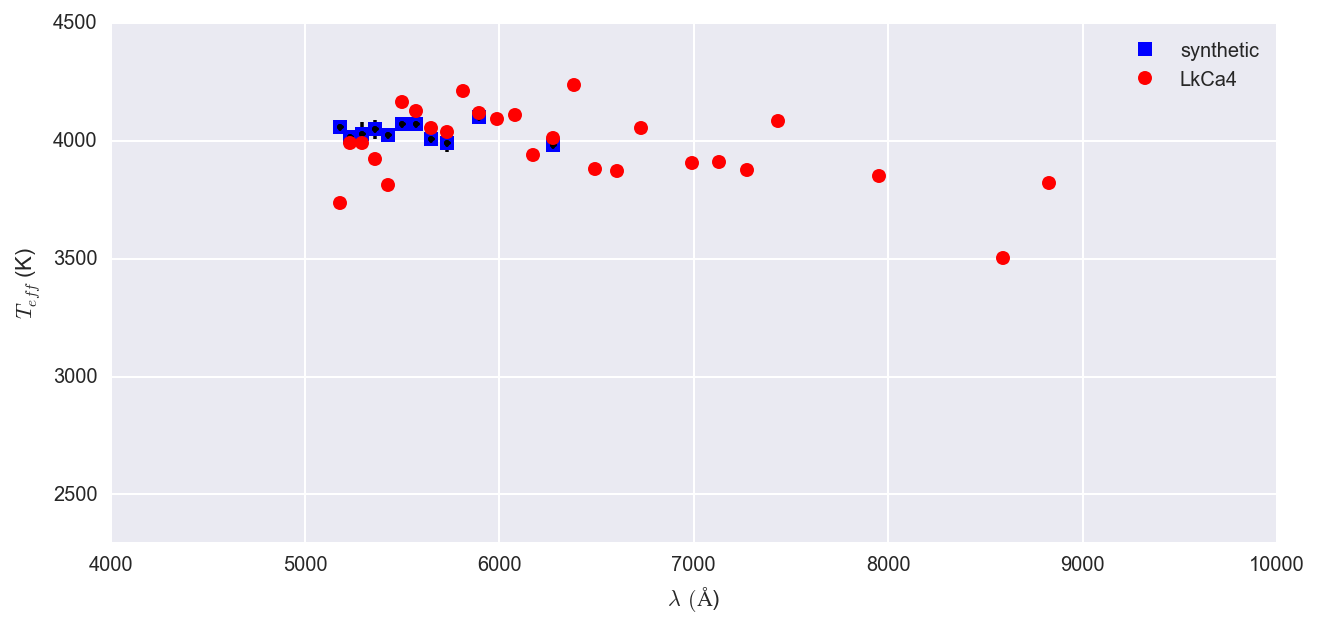

In [67]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.plot(merged.wl_center, merged.Teff_50p, 'bs', label='synthetic')
yerr = merged.Teff_95p - merged.Teff_50p
ax.errorbar(merged.wl_center, merged.Teff_50p, yerr=yerr, fmt='k.')

ax.plot(sf_dat.wl_center, sf_dat.Teff_50p, 'ro', label='LkCa4')

ax.set_ylim(2300, 4500)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/teff_vs_order_Viz_run01.pdf', bbox_inches='tight')

## Plot of $\log{g}$ vs. spectral order

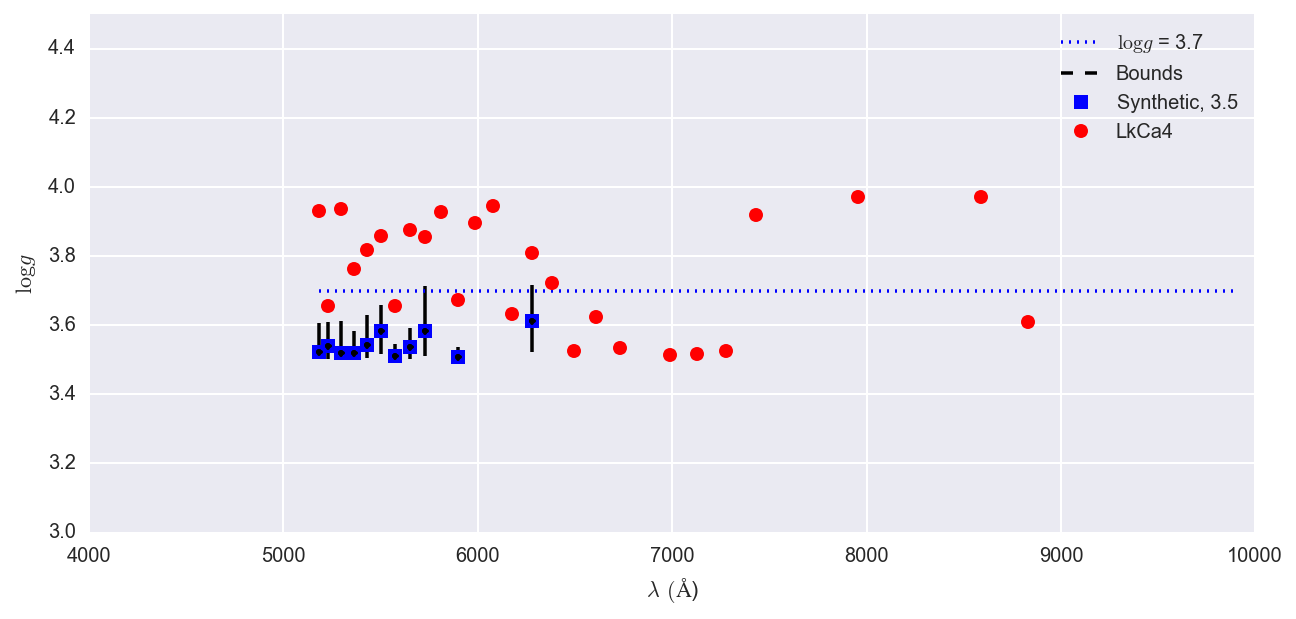

In [64]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

log_g_mean = 3.7
lglabel = "$\log{g}$" +" = {} ".format(log_g_mean)
ax.plot(orders.wl_center, [3.7]*len(orders.wl_center), 'b:', label=lglabel)

ax.plot([10000, 30000], [3.5]*2, 'k--', label='Bounds')
ax.plot([10000, 30000], [4.0]*2, 'k--')

ax.plot(merged.wl_center, merged.logg_50p, 'bs', label='Synthetic, 3.5')
yerr1 = merged.logg_50p - merged.logg_05p
yerr2 = merged.logg_95p - merged.logg_50p
ax.errorbar(merged.wl_center, merged.logg_50p, yerr=[yerr1, yerr2], fmt='k.')

ax.plot(sf_dat.wl_center, sf_dat.logg_50p, 'ro', label='LkCa4')

ax.set_ylim(3.0, 4.5)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$\log{g}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

## Plot of $[\mathrm{Fe}/\mathrm{H}]$ vs. spectral order

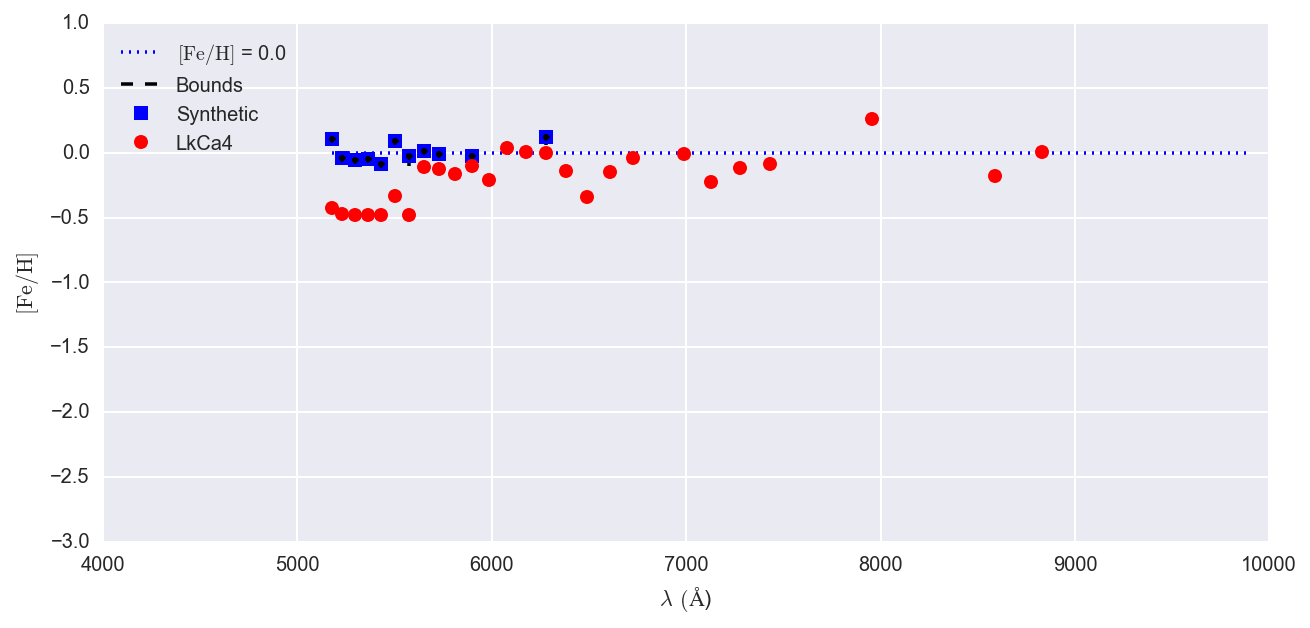

In [60]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

feh_mean = 0.0
fehlabel = "$[\mathrm{Fe}/\mathrm{H}]$" +" = {} ".format(feh_mean)
ax.plot(orders.wl_center, [feh_mean]*len(orders.wl_center), 'b:', label=fehlabel)

ax.plot([10000, 30000], [-0.5]*2, 'k--', label='Bounds')
ax.plot([10000, 30000], [0.5]*2, 'k--')

ax.plot(merged.wl_center, merged.FeH_50p, 'bs', label = 'Synthetic')
yerr1 = merged.FeH_50p - merged.FeH_05p
yerr2 = merged.FeH_95p - merged.FeH_50p
ax.errorbar(merged.wl_center, merged.FeH_50p, yerr=[yerr1, yerr2], fmt='k.')

ax.plot(sf_dat.wl_center, sf_dat.FeH_50p, 'ro', label='LkCa4')


ax.set_ylim(-3.0, 1.0)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$[\mathrm{Fe}/\mathrm{H}]$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

## Plot of $RV$ vs. spectral order

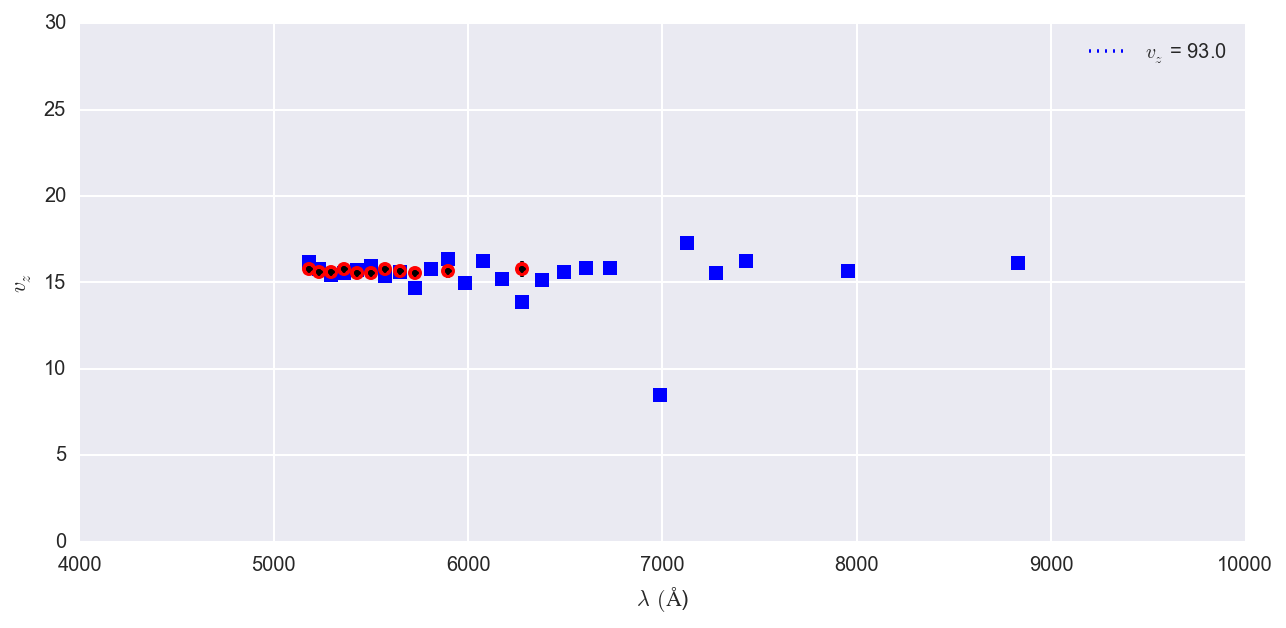

In [38]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 93.0
thislabel = "$v_z$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=thislabel)

ax.plot(sf_dat.wl_center, sf_dat.vz_50p, 'bs')

ax.plot(merged.wl_center, merged.vz_50p, 'ro')
yerr1 = merged.vz_50p - merged.vz_05p
yerr2 = merged.vz_95p - merged.vz_50p
ax.errorbar(merged.wl_center, merged.vz_50p, yerr=[yerr1, yerr2], fmt='k.')

ax.set_ylim(0, 30)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$v_z$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

Vsini

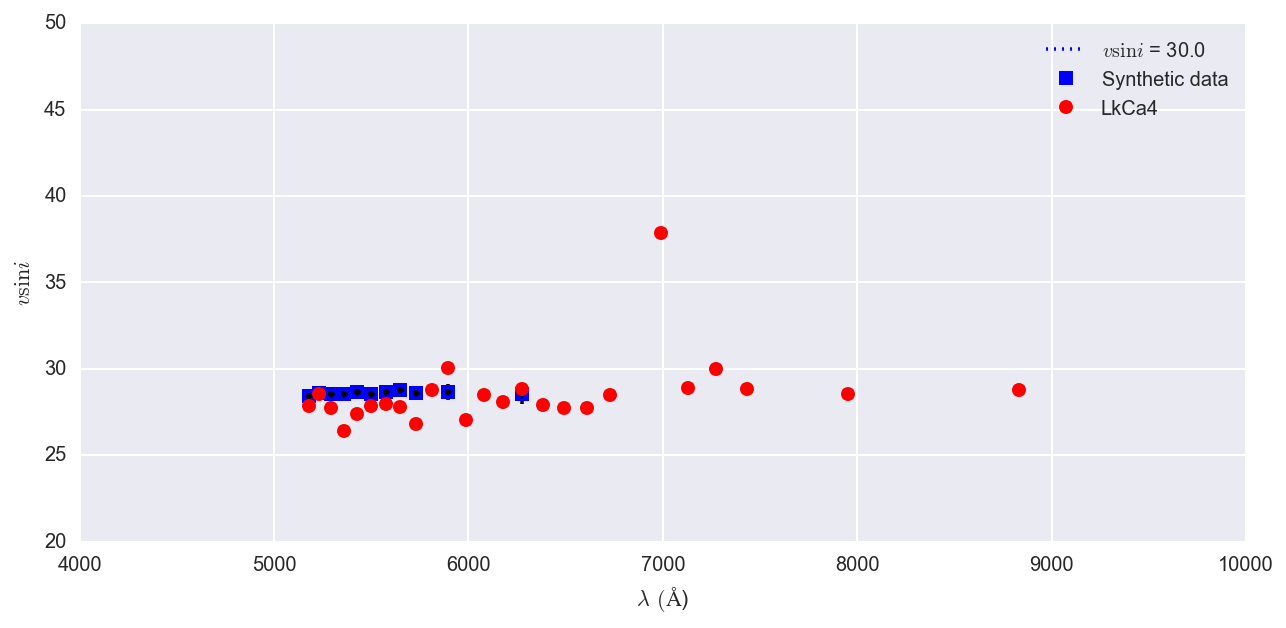

In [58]:
#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 30.0
thislabel = "$v\sin{i}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=thislabel)

ax.plot(merged.wl_center, merged.vi_50p, 'bs', label='Synthetic data')
yerr1 = merged.vi_50p - merged.vi_05p
yerr2 = merged.vi_95p - merged.vi_50p
ax.errorbar(merged.wl_center, merged.vi_50p, yerr=[yerr1, yerr2], fmt='k.')

ax.plot(sf_dat.wl_center, sf_dat.vi_50p, 'ro', label='LkCa4')

ax.set_ylim(20, 50)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$v \sin{i}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

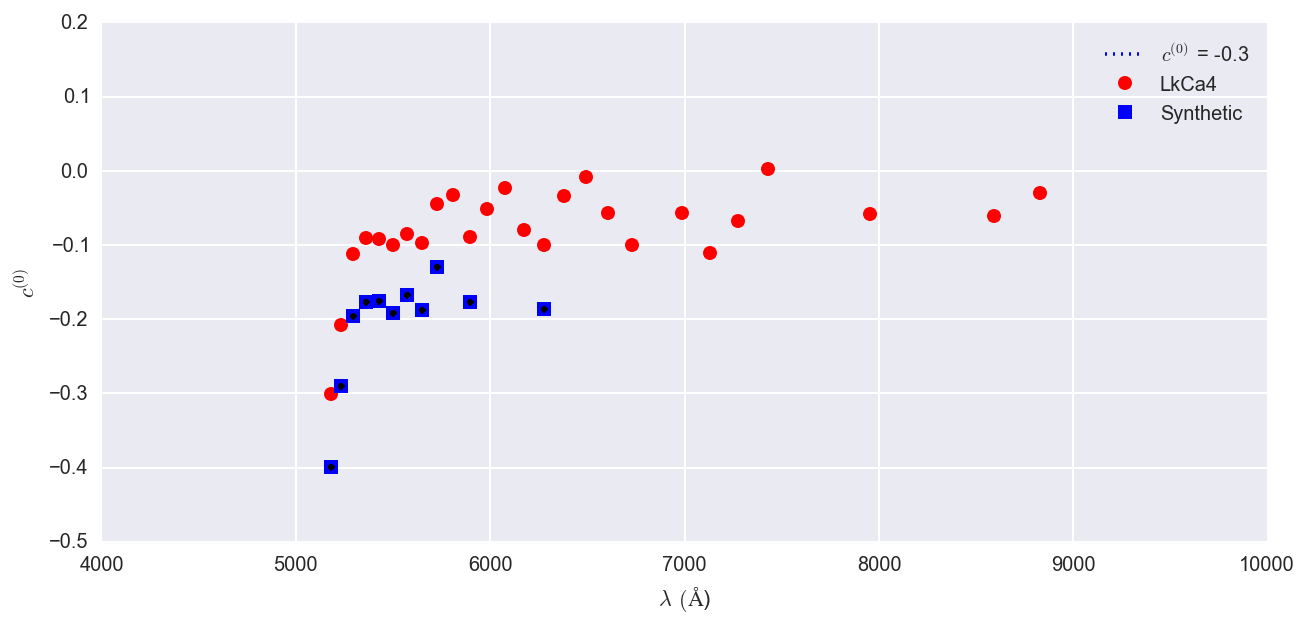

In [42]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -0.3
this_label = "$c^{(0)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.logO_50p
y05 = merged.logO_05p
y95 = merged.logO_95p

ax.plot(sf_dat.wl_center, sf_dat.logO_50p, 'ro', label='LkCa4')

ax.plot(x, y, 'bs', label = 'Synthetic')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.5, 0.2)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$c^{(0)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

# Order-by-order calibration parameters

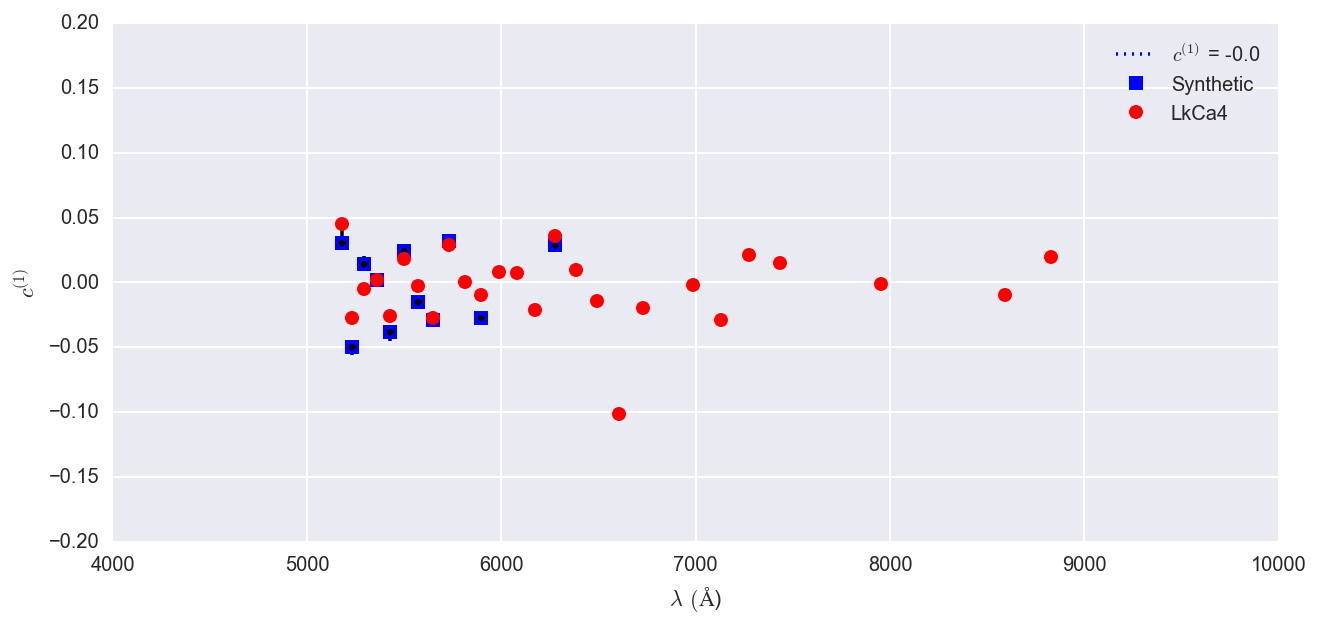

In [57]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -0.0
this_label = "$c^{(1)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c1_50p
y05 = merged.c1_05p
y95 = merged.c1_95p


ax.plot(x, y, 'bs', label = 'Synthetic')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')
ax.plot(sf_dat.wl_center, sf_dat.c1_50p, 'ro', label='LkCa4')

ax.set_ylim(-0.2, 0.2)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$c^{(1)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

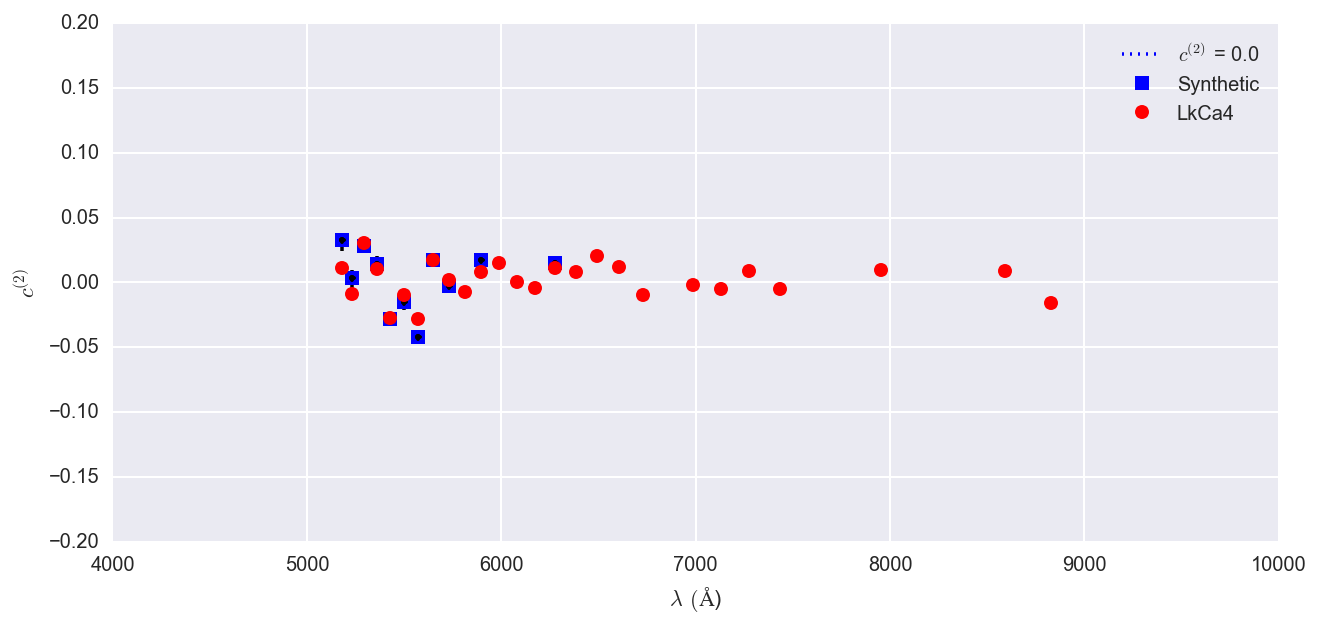

In [51]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.0
this_label = "$c^{(2)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c2_50p
y05 = merged.c2_05p
y95 = merged.c2_95p
ax.plot(x, y, 'bs', label='Synthetic')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')

ax.plot(sf_dat.wl_center, sf_dat.c2_50p, 'ro', label='LkCa4')

ax.set_ylim(-0.2, 0.2)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$c^{(2)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

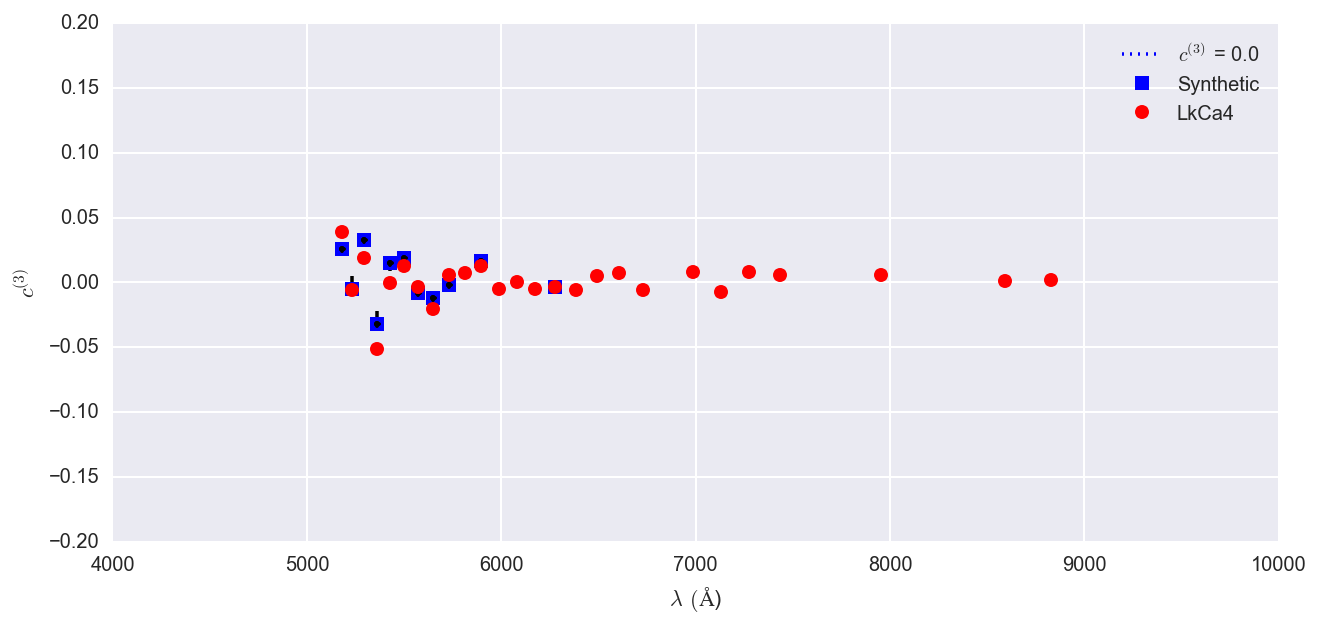

In [52]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.0
this_label = "$c^{(3)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c3_50p
y05 = merged.c3_05p
y95 = merged.c3_95p
ax.plot(x, y, 'bs', label = 'Synthetic')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')
ax.plot(sf_dat.wl_center, sf_dat.c3_50p, 'ro', label='LkCa4')

ax.set_ylim(-0.2, 0.2)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$c^{(3)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

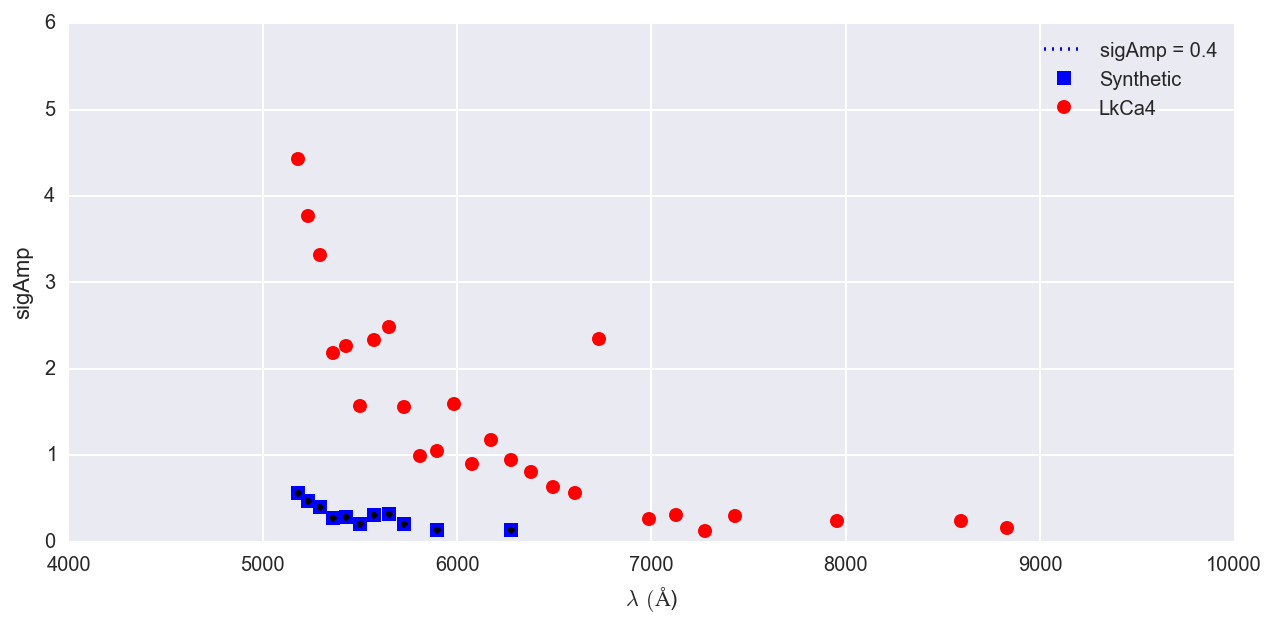

In [53]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.4
this_label = "sigAmp" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.SA_50p
y05 = merged.SA_05p
y95 = merged.SA_95p
ax.plot(x, y, 'bs', label = 'Synthetic')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')
ax.plot(sf_dat.wl_center, sf_dat.SA_50p, 'ro', label='LkCa4')

ax.set_ylim(0.0, 6.0)
ax.set_xlim(4000, 10000)
ax.set_ylabel('sigAmp')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

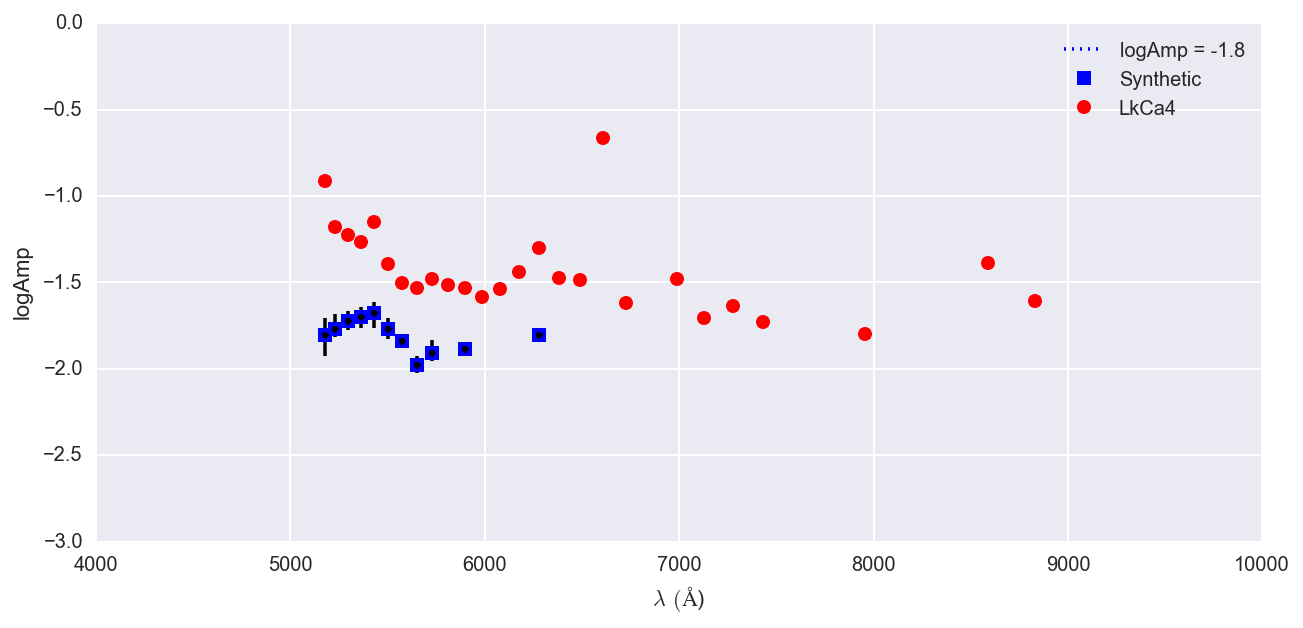

In [54]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -1.8
this_label = "logAmp" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.LA_50p
y05 = merged.LA_05p
y95 = merged.LA_95p
ax.plot(x, y, 'bs', label = 'Synthetic')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')
ax.plot(sf_dat.wl_center, sf_dat.LA_50p, 'ro', label='LkCa4')

ax.set_ylim(-3, 0.0)
ax.set_xlim(4000, 10000)
ax.set_ylabel('logAmp')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

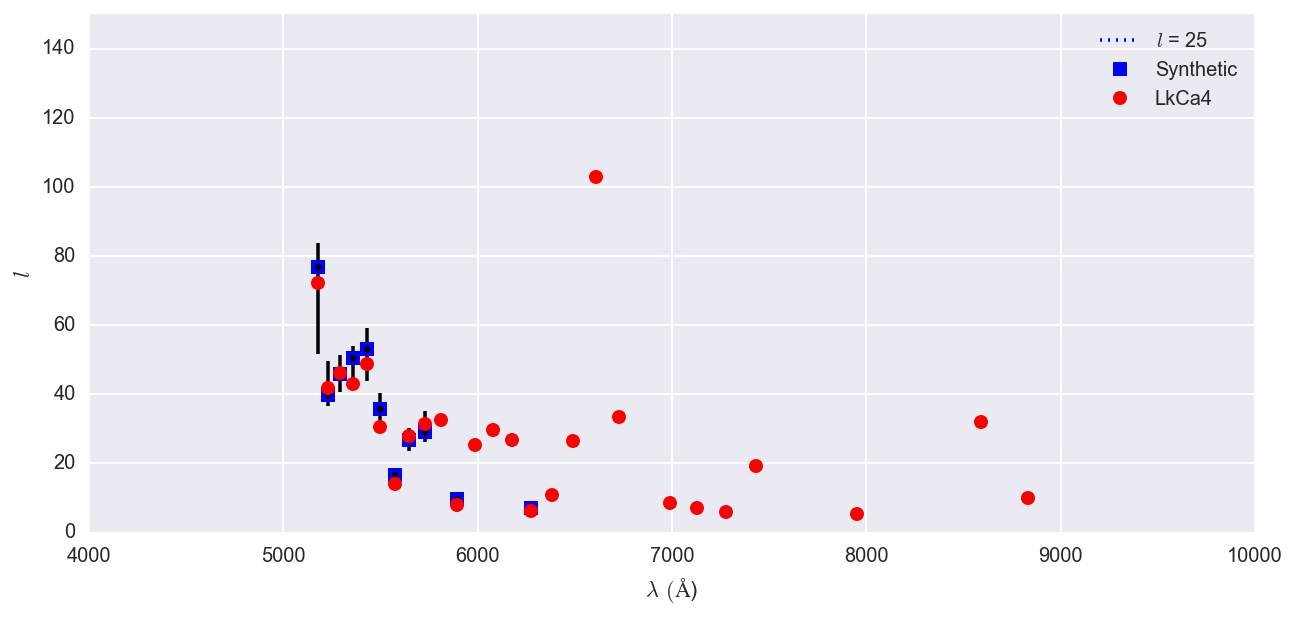

In [66]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 25
this_label = "$l$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.ll_50p
y05 = merged.ll_05p
y95 = merged.ll_95p
ax.plot(x, y, 'bs', label = 'Synthetic')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')
ax.plot(sf_dat.wl_center, sf_dat.ll_50p, 'ro', label='LkCa4')

ax.set_ylim(0, 150)
ax.set_xlim(4000, 10000)
ax.set_ylabel('$l$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

Par-par plot

In [ ]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.8])




ax.plot(merged.FeH_50p, merged.Teff_50p, 'ro')
yerr1 = merged.Teff_50p - merged.Teff_05p
yerr2 = merged.Teff_95p - merged.Teff_50p
xerr1 = merged.FeH_50p - merged.FeH_05p
xerr2 = merged.FeH_95p - merged.FeH_50p
ax.errorbar(merged.FeH_50p, merged.Teff_50p, yerr=[yerr1, yerr2], xerr=[xerr1, xerr2], fmt='k.')


ax.set_xlim(-0.5, 0.5)
ax.set_ylim(3000, 4500)
ax.set_ylabel('$T_{eff}$')
ax.set_xlabel('[Fe/H]')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

# Save the merged DataFrame

In [56]:
merged.to_csv('../data/analysis/synthetic_run03_last10kMCMC.csv', index=False)

The end for now.  